### Цель проекта
Целью данного проекта является построение модели машинного обучения для диагностики хронических заболеваний почек (ХБП) на основе медицинских показателей пациентов.

### Задачи:
1. Провести разведочный анализ данных (EDA).
2. Подготовить данные для моделирования.
3. Построить и сравнить модели машинного обучения.
4. Подобрать оптимальные гиперпараметры.
5. Проанализировать важность признаков и сделать выводы.


In [2]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Загрузка и первичный анализ данных

df = pd.read_csv('C:\\IDE\\Применение машинного обучения для анализа медицинских данных\\итог\\chronic.csv')
df.replace('?', np.nan, inplace=True)
print(df.info())
print(df.head())
print(df['class'].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     391 non-null    object
 1   bp      388 non-null    object
 2   sg      353 non-null    object
 3   al      354 non-null    object
 4   su      351 non-null    object
 5   rbc     248 non-null    object
 6   pc      335 non-null    object
 7   pcc     396 non-null    object
 8   ba      396 non-null    object
 9   bgr     356 non-null    object
 10  bu      381 non-null    object
 11  sc      383 non-null    object
 12  sod     313 non-null    object
 13  pot     312 non-null    object
 14  hemo    348 non-null    object
 15  pcv     329 non-null    object
 16  wc      294 non-null    object
 17  rc      269 non-null    object
 18  htn     398 non-null    object
 19  dm      398 non-null    object
 20  cad     398 non-null    object
 21  appet   399 non-null    object
 22  pe      399 non-null    ob

In [4]:
# Предобработка данных

# Числовые признаки
numeric_cols = ['age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'al', 'su', 'bp']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Категориальные признаки
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Заполнение пропусков
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Специфическая обработка признака sg
df['sg'] = df['sg'].fillna(df['sg'].mode()[0])

# Обработка целевой переменной
df['class'] = df['class'].fillna('missing').astype(str).str.strip().str.lower()
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

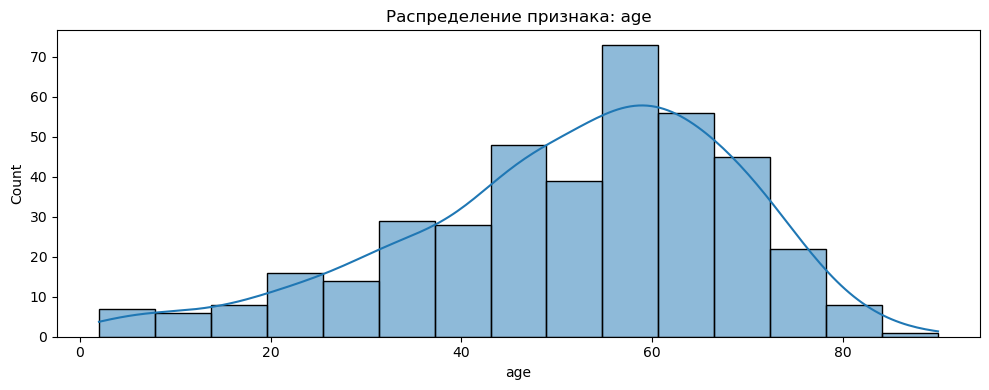

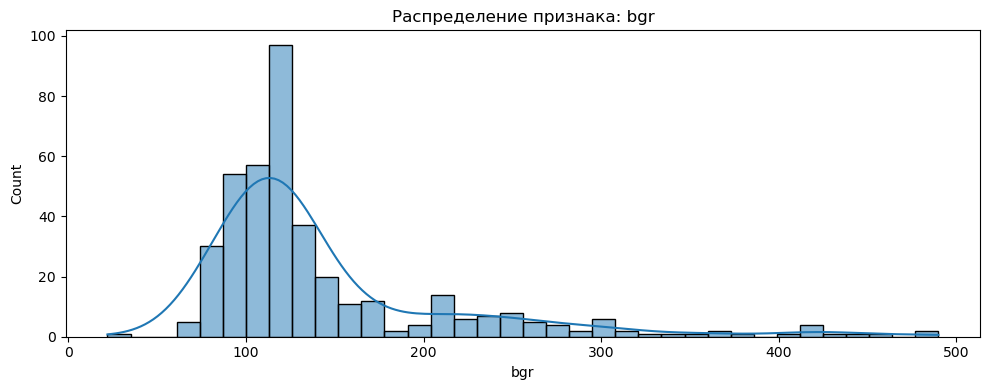

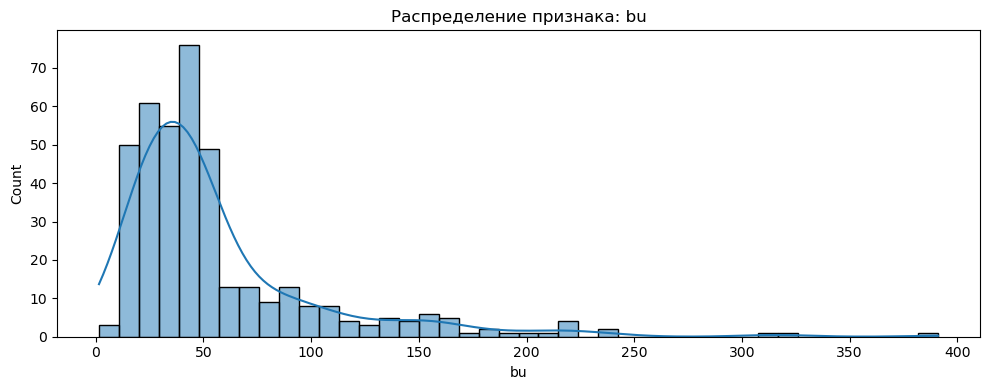

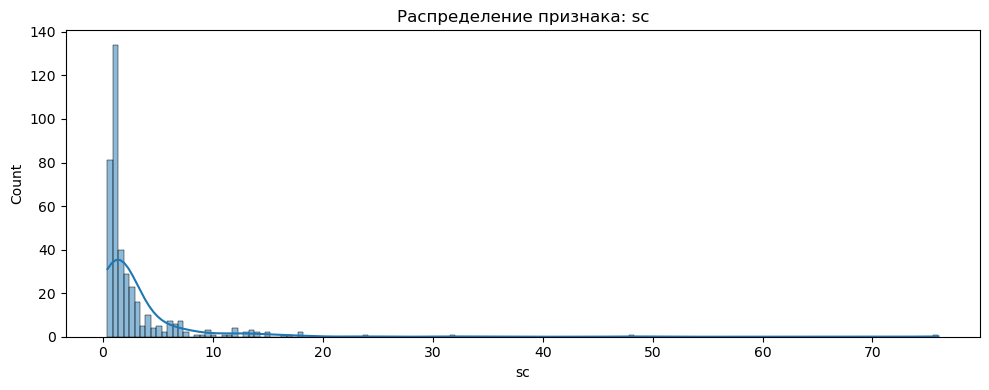

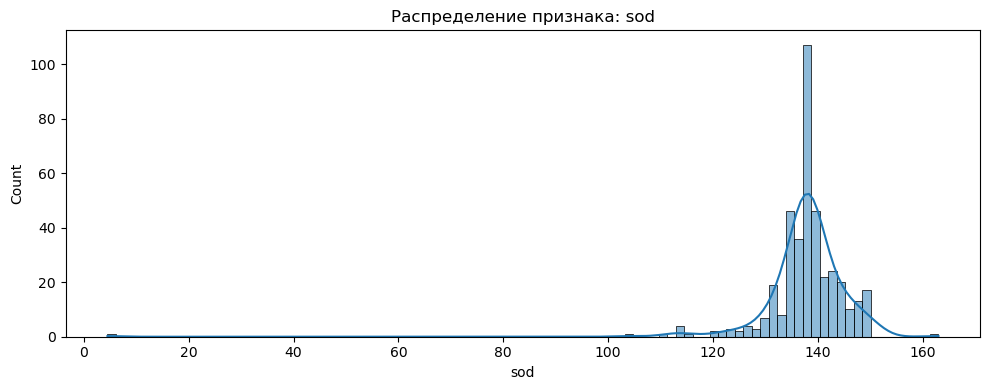

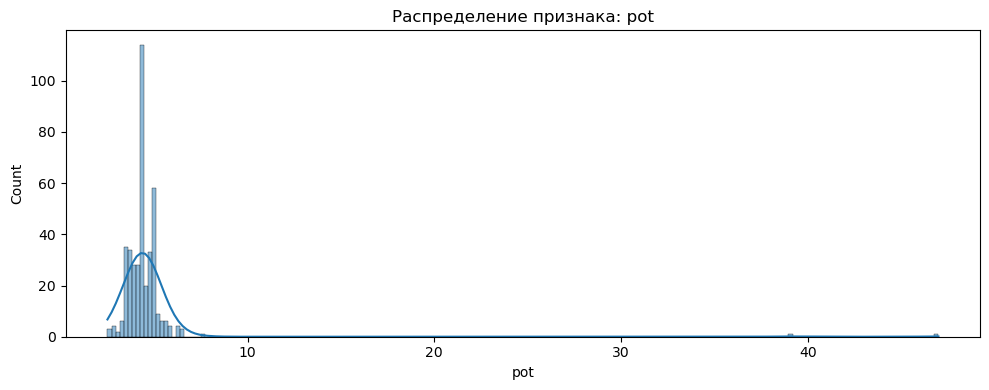

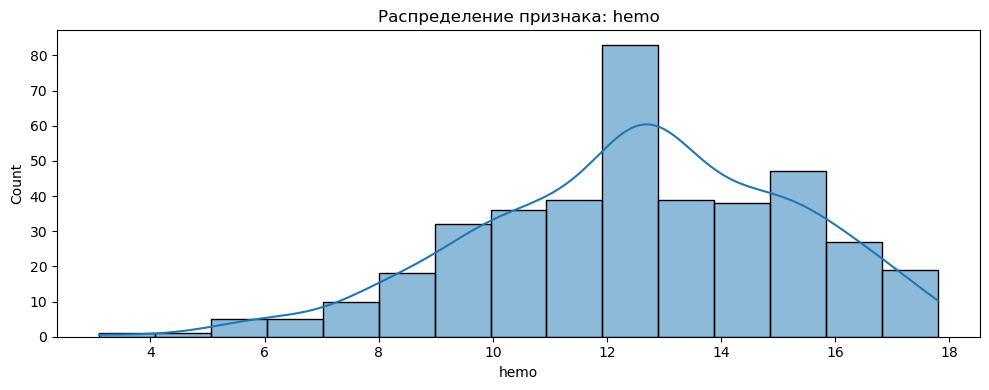

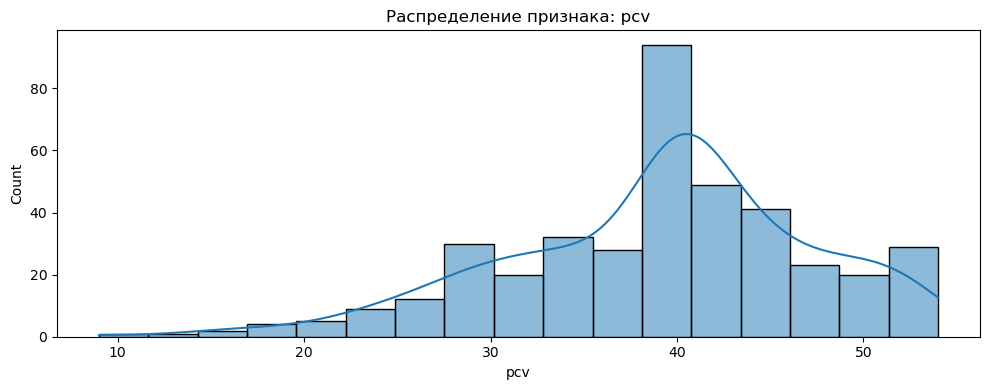

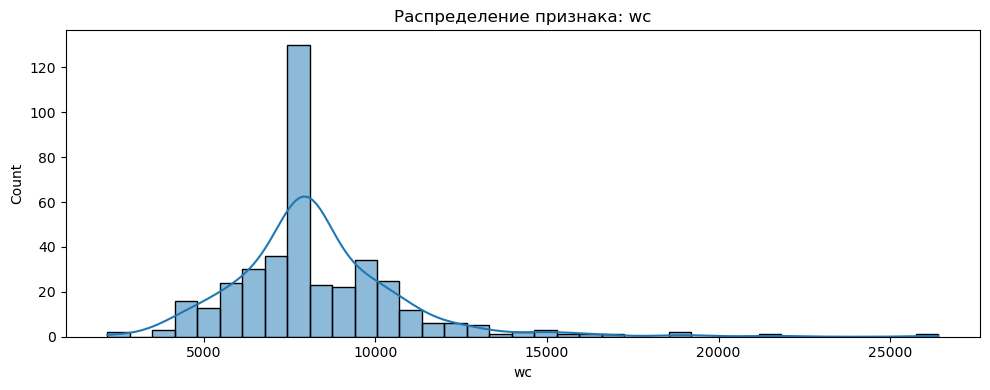

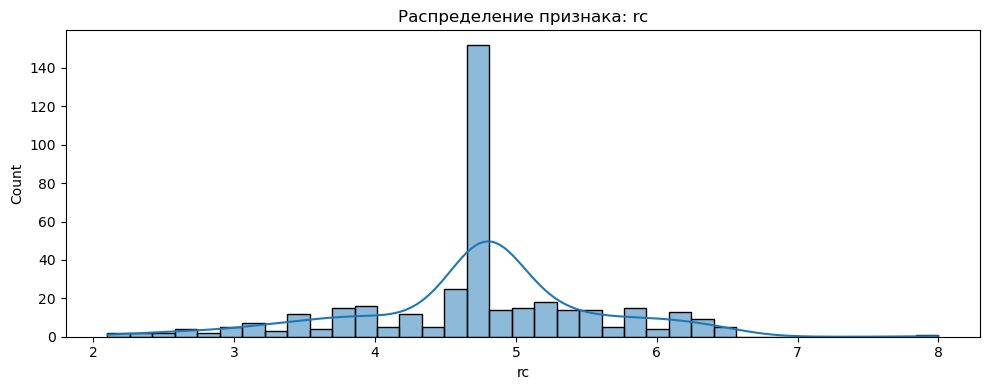

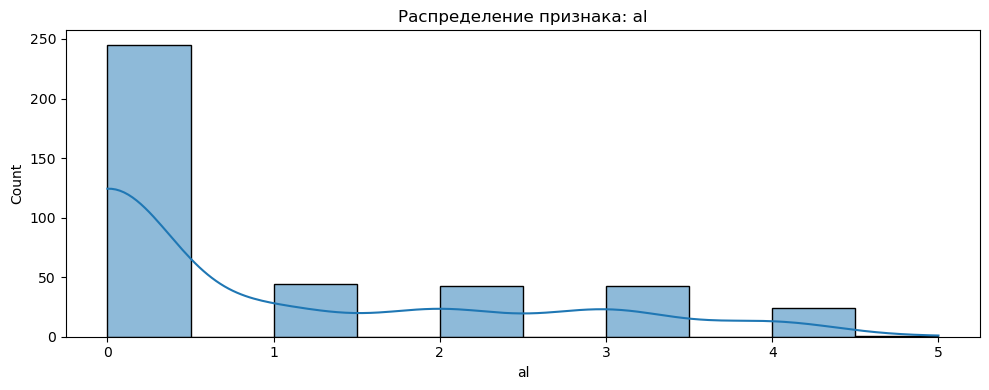

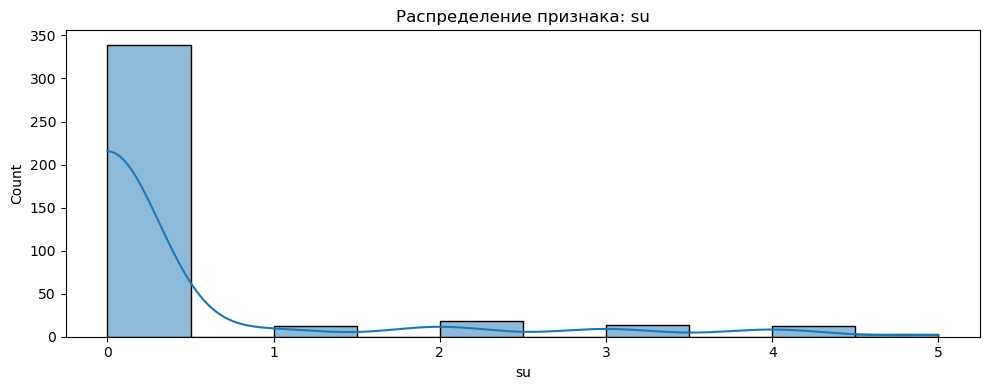

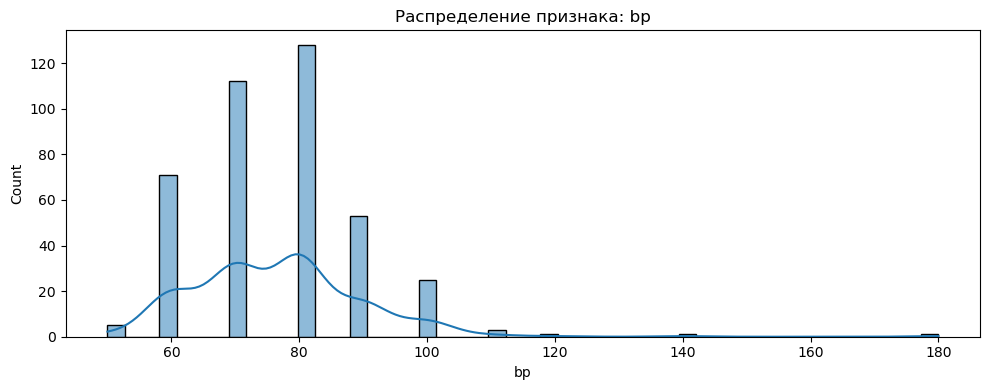

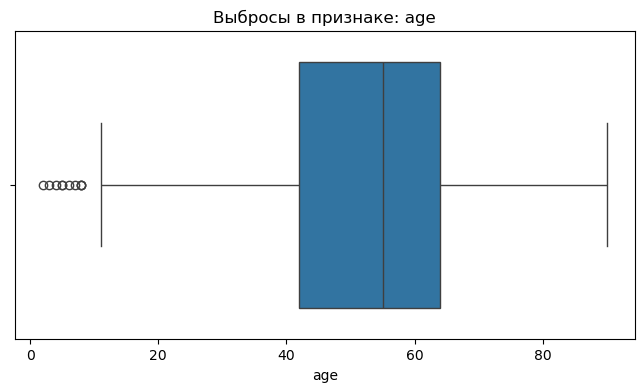

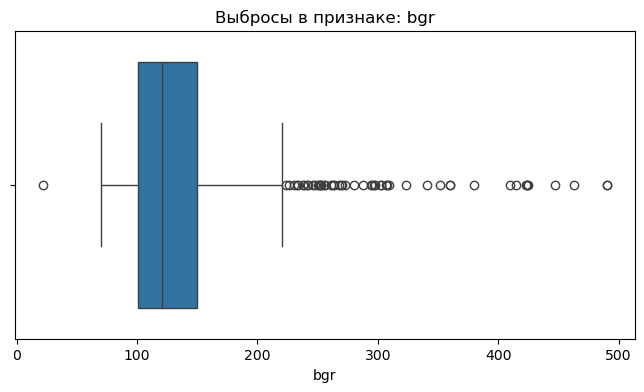

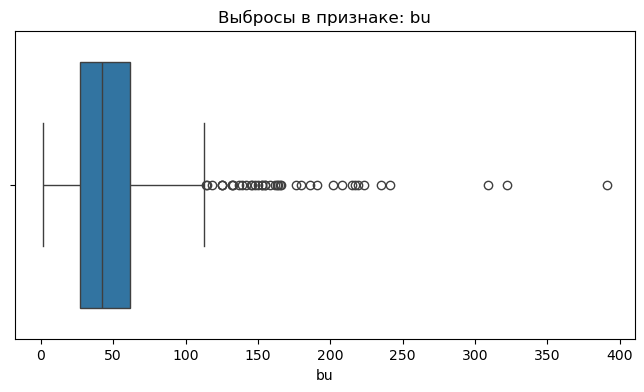

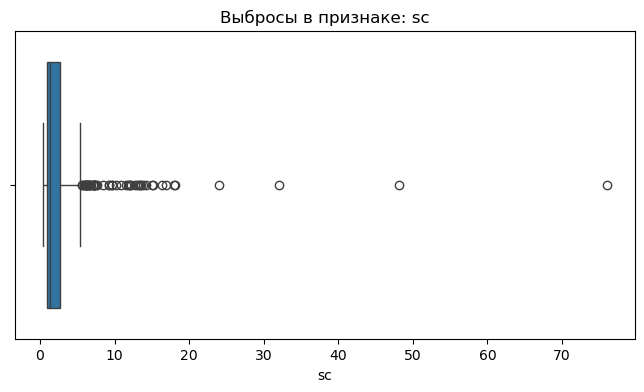

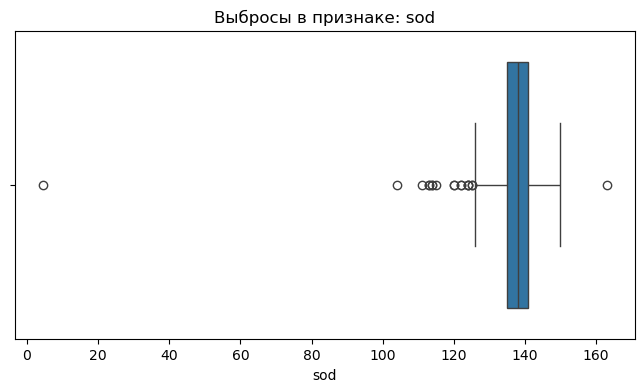

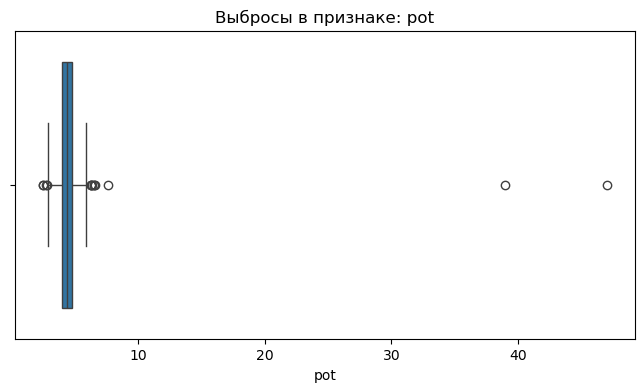

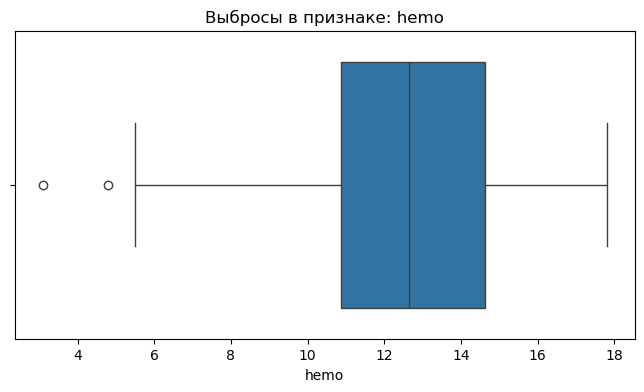

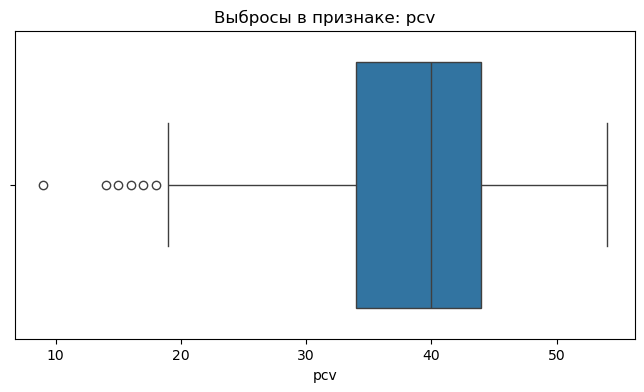

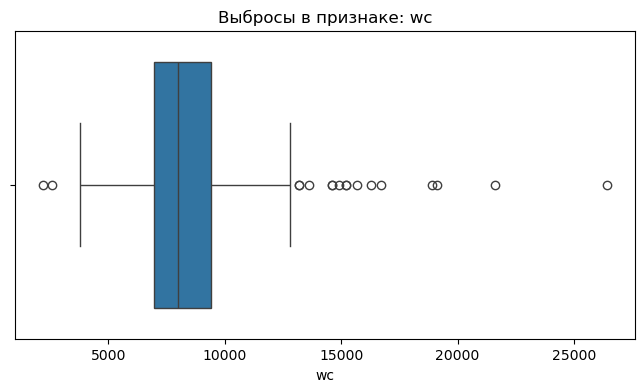

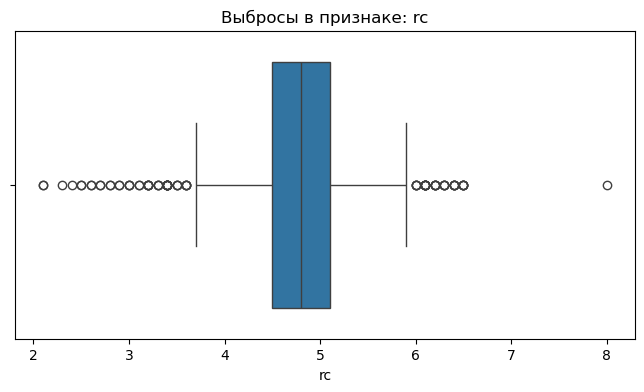

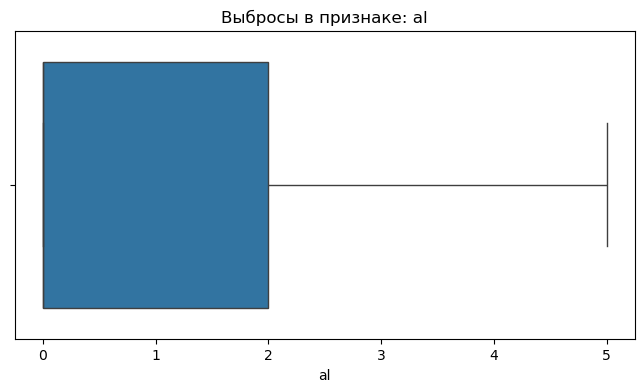

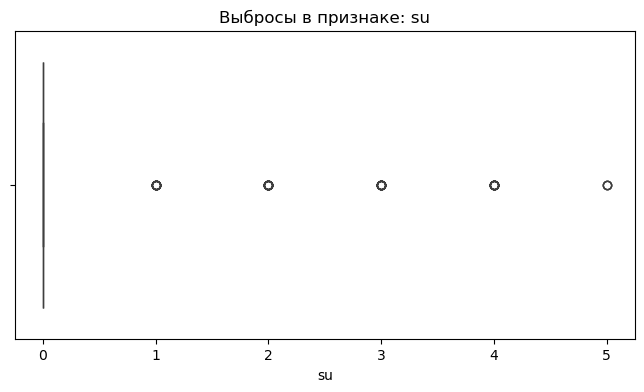

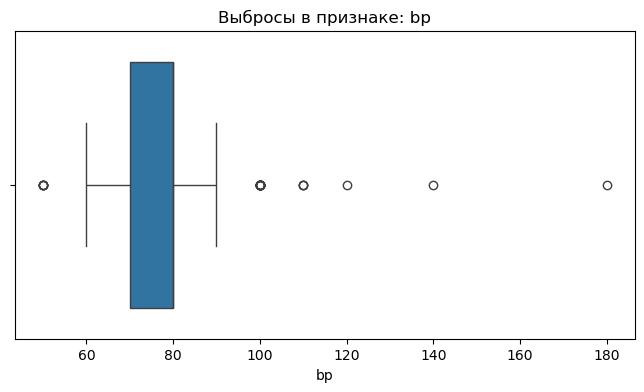

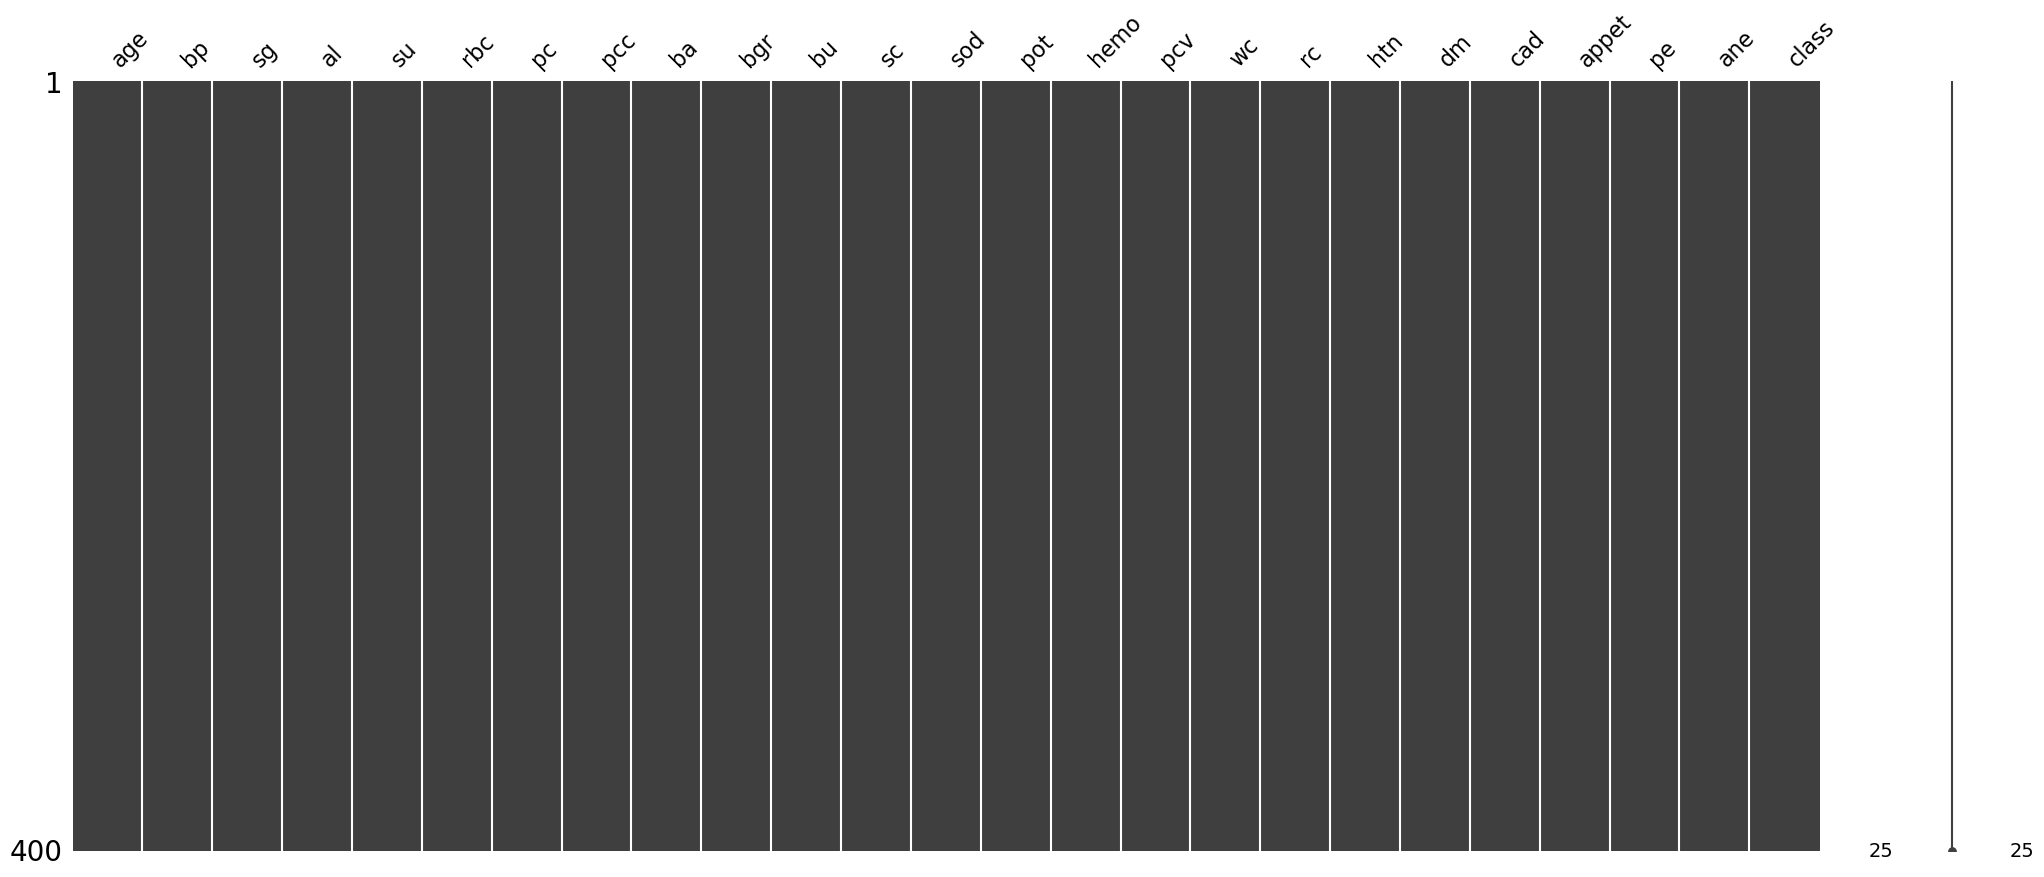

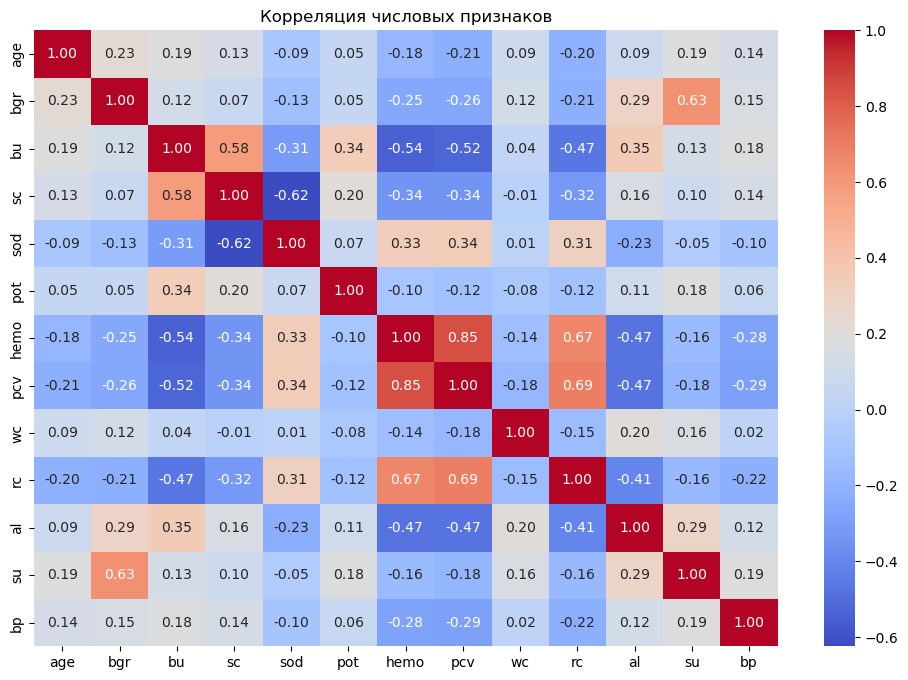

In [5]:
# Визуализация распределений и корреляций

# Распределения числовых признаков
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение признака: {col}')
    plt.tight_layout()
    plt.show()

# Анализ выбросов
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Выбросы в признаке: {col}')
    plt.show()

# Пропущенные значения
msno.matrix(df)
plt.show()

# Корреляция
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция числовых признаков')
plt.show()

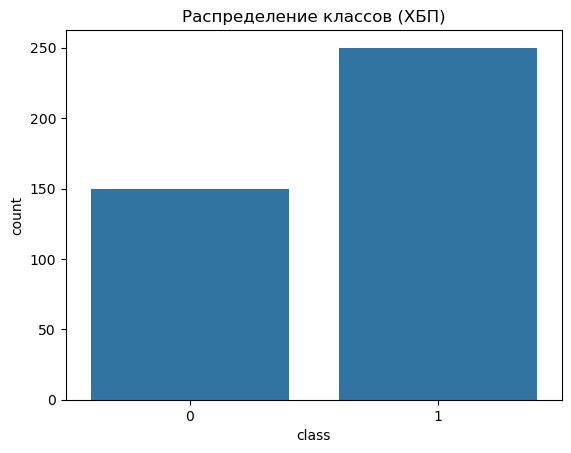

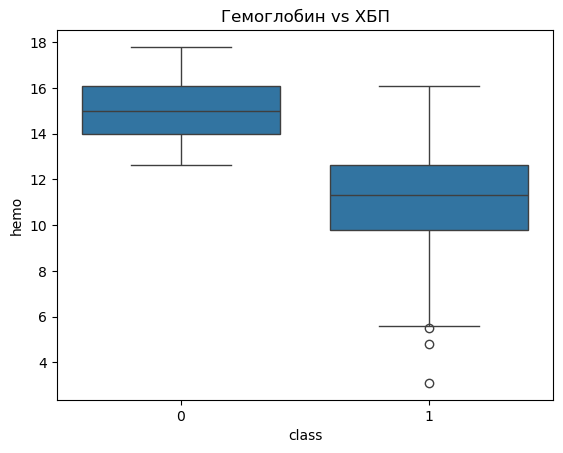

In [6]:
# Анализ целевой переменной

sns.countplot(x='class', data=df)
plt.title('Распределение классов (ХБП)')
plt.show()

sns.boxplot(x='class', y='hemo', data=df)
plt.title('Гемоглобин vs ХБП')
plt.show()

In [7]:
# Подготовка данных для моделирования

# Кодирование категориальных признаков
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Масштабирование числовых признаков
scale_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Разделение на X и y
X = df.drop(columns=['class'])
y = df['class']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Размеры выборок:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Размеры выборок:
X_train: (320, 24)
X_test: (80, 24)


In [8]:
# Сравнение моделей

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix:
[[30  0]
 [ 1 49]]

=== Random Forest ===
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[30  0]
 [ 0 50]]

=== SVM ===
Accuracy: 0.9750
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.0

In [9]:
# Подбор гиперпараметров Random Forest

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее качество на кросс-валидации:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Точность на тесте:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Лучшее качество на кросс-валидации: 0.990625
Точность на тесте: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Матрица ошибок:
 [[30  0]
 [ 0 50]]
